# Deep Learning 정확도 높이기
> MNIST dataset에 ReLU, Xavier 초기화, Dropout 적용하기

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import warnings

warnings.filterwarnings(action = "ignore")     # warning 출력 제한

## MNIST dataset 탐구


In [2]:
# data load

mnist = input_data.read_data_sets("./data/mnist",
                                 one_hot = True)
# MNIST data set 불러들인 후, data 폴더 안에 4개의 압축파일 생성.
# x : 픽셀 데이터, 약 55000개의 이미지. 28*28 pixel.
# y : x 데이터에 onehot encoding 처리.

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

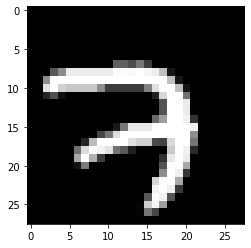

In [3]:
# X data 탐구.
## 각각의 데이터 별로 0과 1 사이로 변환된 진하기가 들어 있다.
print(mnist.train.images[0]) 

# label 탐구
# 첫 번째 이미지는 multinomial label을 본 결과, 숫자 "7"이다.
print(mnist.train.labels[0])

# 그림 그려보기
# 28*28 사이즈로 reshape 후 그림 그리기.
pix = mnist.train.images[0].reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(pix, cmap="gray")

## Deep Learning
---
> single layer의 x ~ y에서 "~"에 해당하는 단계에 layer 중첩
---
* 1) 여러 개의 weights, bias 설정.
    * 단순 logistic model에서는 1개의 weight, bias만 지정.
    * 그러나 딥러닝에서는 여러 계층을 만들어 신경망을 만들고, 각 계층에서 logistic model을 여러 개 구현.
* 2) 적절한 수의 perceptron 설정.
    * 계층이 너무 많으면 depth 문제로 시간이 오래 걸리고, 정확한 연산이 오히려 안 될 수 있음.
    * 각 계층별 weight와 bias의 shape에 주의할 것
* 3) epoch, batch : 각 학습의 단계별로 data의 개수를 나누어 진행.


### 1. 기존의 방식으로 진행
* 이 단계에서는 일단 ReLU 적용 전이므로, sigmoid나 softmax나 상관 없이 그냥 사용.
* 처음에 강사님 H에 sigmoid 설정했음 -> Q) multinomial에 대해 딥러닝 진행하니까, softmax를 써야 하는 것 아닌가? -> A) 그렇게 하자! sigmoid나 softmax나 크게 차이는 없다. 어차피 operation function은 나중에 바뀌어야 한다.

In [4]:
tf.reset_default_graph() # 그래프 초기화

# 1. placeholder
## 입력 파라미터 받은 후 학습 진행 + 정확도 구하고 + 예측하는 tensor.
X = tf.placeholder(shape = [None, 784], dtype = tf.float32) # 784 = 28*28.
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)

# 2. weight, bias 설정
## layer1 -> layer2 -> layer3: 각 계층의 결과를 받아서 다음 계층으로 넘김.
## 256은 강사님이 임의로 설정한 수. 관용적인 용법 존재하지 않음.

## X data 각각에 대해서 256번 학습 진행.
W1 = tf.Variable(tf.random_normal([784, 256]), name = "weight1")
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

## 256번 학습한 걸 다시 돌려서 256번 학습 진행.
W2 = tf.Variable(tf.random_normal([256, 256]), name = "weight2")
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
layer2= tf.sigmoid(tf.matmul(layer1, W2) + b2)

## 최종적으로 10개의 label값에 맞도록 학습 진행.
W3 = tf.Variable(tf.random_normal([256, 10]), name ="weight3")
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")

# 3. hypothesis
logit = tf.matmul(layer2, W3) + b3
H = tf.nn.softmax(logit)

# 4. cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                labels = Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 6. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 7. learning
## 데이터셋의 개수가 많으면 학습이 어렵기 때문에, batch 통해 큰 사이즈의 데이터를 나눔.

num_of_epoch = 30  # 전체 학습 횟수
batch_size = 100   # 데이터셋의 개수를 몇 개로 나눌 것인가

for step in range(num_of_epoch):
    num_of_iteration = int(mnist.train.num_examples / batch_size)  # 한 번의 epoch에 몇 번의 batch를 불러와야 하는가
    cost_val = 0
    for i in range(num_of_iteration):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
            # next_batch : mnist.train 안에 내장된 함수로, 몇 개씩 데이터를 불러들일지 정해주는 함수.
            # 1) for문 통해 batch 개수만큼 불러와야 하는데, tensorflow의 mnist 예제에는 next_batch로 그 과정이 이미 구현되어 있다
            # 2) x, y data로 나눠줘야 하는데, next_batch 함수 쓰면 그 자체에서 x, y data로 나뉘어서 도출됨.
        _, cost_val = sess.run([train, cost], feed_dict = {X : batch_x,
                                                          Y : batch_y})
            # iteration 한 번 돌 때마다 cost_val이 나온다.
            # batch_1에 대한 cost_val, batch_2에 대한 cost_val, ..., batch_550에 대한 cost_val.

    if step % 3 == 0 :
        print(f"cost 값은 : {cost_val}")
             # 3, 6, 9, ...번째 학습 단계마다 cost 값을 찍어라.
            # 출력되는 cost값은 마지막 batch에 대한 cost값.
            
print("학습 끝")

# 8. accuracy 측정

predict = tf.argmax(H, 1)    # 예측값
correct= tf.equal(predict, tf.argmax(Y,1))   # Y에 test label 넣어서 predict와 비교
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
    # correct인지 아닌지 판단한 것을 실수 값으로 변환 -> 1인 게 예측 맞은 것.
    # 평균 냄 -> "(1의 합) / (전체 개수)"이므로, 얼마나 맞는지 확인할 수 있음.
result = sess.run(accuracy,
                  feed_dict = {X : mnist.test.images,
                               Y : mnist.test.labels})
    # X에 test용으로 제공된 이미지 넣어서 predict.
    # Y에 label으로 제공된 이미지 넣어서 predict와 correct 작업 진행.
    # result 변수에 저장.
    
print(f"정확도는 {result * 100}%입니다.")

cost 값은 : 0.9665764570236206
cost 값은 : 0.6756019592285156
cost 값은 : 0.47195690870285034
cost 값은 : 0.26232409477233887
cost 값은 : 0.22157913446426392
cost 값은 : 0.25711145997047424
cost 값은 : 0.25551527738571167
cost 값은 : 0.24147453904151917
cost 값은 : 0.09975516051054001
cost 값은 : 0.13791650533676147
학습 끝
정확도는 91.64000153541565%입니다.


### 2. 정확도 향상
---
> 딥러닝을 진행하였으나, 기존에 multinomial classification으로 진행했을 때와 비교해서 정확도가 유의미하게 향상되지는 않았다. 다음의 방식을 통해 딥러닝의 정확도를 향상시킬 수 있다.
---

* 1. ReLU함수 사용 : 딥러닝의 activation function은 전부 ReLU 사용.
* 2. 가중치 설정 : (딥러닝 뿐이 아니더라도) Xavier initializer 사용.
* 3. optimizer : `GradientDescentOptimzer` 외에 `AdamOptimizer` 사용할 수 있음.
* 4. dropout : 과적합 방지하기 위한 dropout 방식 사용.

#### 2.1. Activation Function : ReLU함수
---
> Deep Learning에서 정확도를 향상시키기 위해서는, ReLU(Rectified Linear Unit) 함수를 사용한다.
---
* 딥러닝은 학습을 `deep & wide`하게 진행하기 위해 layer 추가하고, 각 layer에 많은 perceptron을 추가해서 구현하는 방식이다.
* 이러한 multi layer 학습 방식에 sigmoid/softmax 함수를 적용하게 되면, Vanishing Gradient 문제가 발생한다.
    * sigmoid가 중첩되면서 W, b 값이 0에 수렴한다(=vanish).
    * 즉, sigmoid 함수의 특성으로 인해 y label이 0과 1 사이의 값을 갖는데, 이 값들이 여러 layer를 거치며 sigmoid함수를 여러 번 지나게 되면, 0에 가까운 값들이 계속해서 곱해지면서 굉장히 작은 값을 갖게 된다.
    * 이로 인해 layer가 깊어질수록 학습 및 예측이 어려워지는 현상이 나타나는 것이다.
* Hinton교수가 고안한 ReLU 함수는, 입력값이 0보다 작을 때에는 non-active를 할당하고, 0보다 클 때에는 그 값을 그대로 반환한다.
    * x>0이면 기울기가 1인 직선이고, x<0이면 함수값이 0이 된다.
    * x<0인 값들에 대해서는 기울기가 0이기 때문에 뉴런이 죽을 수 있는 단점이 존재한다.
* activation function만 바꾸면 된다. cost function에서 softmax entropy 함수는 바꿀 필요 없다.
```
# 기존의 activation function 설정
layer1 = tf.nn.softmax(tf.matmul(X, W1) + b1)
H = tf.nn.softmax(logit)
# ReLU 함수 이용
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
H = tf.nn.relu(logit)
```

In [10]:
tf.reset_default_graph()

# model 설정

X = tf.placeholder(shape = [None, 784], dtype = tf.float32) 
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256]), name = "weight1")
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]), name = "weight2")
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
layer2= tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]), name ="weight3")
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")


logit = tf.matmul(layer2, W3) + b3
H = tf.nn.relu(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                labels = Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

num_of_epoch = 30  
batch_size = 100   

for step in range(num_of_epoch):
    num_of_iteration = int(mnist.train.num_examples / batch_size) 
    cost_val = 0

    for i in range(num_of_iteration):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = {X : batch_x,
                                                          Y : batch_y})

    if step % 3 == 0 :
        print(f"cost 값은 : {cost_val}")
            
print("학습 끝")

# accuracy 측정

predict = tf.argmax(H, 1)    
correct= tf.equal(predict, tf.argmax(Y,1)) 
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
result = sess.run(accuracy,
                  feed_dict = {X : mnist.test.images,
                               Y : mnist.test.labels})
print(f"정확도는 {result * 100}%입니다.")

cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
cost 값은 : nan
학습 끝
정확도는 9.799999743700027%입니다.


* 그럼에도 불구하고, cost 값이 `nan`이 나오는데, 이는 모델이 발산한다는 의미이다.
* 아래와 같이 다시 진행하면, cost 값이 정상적으로 나온다.
* 이는, 초기 weight 값이 어떻게 주어지는지에 따라 운이 좋으면 발산하지 않게 되는 것이다.
* 이제는 **weight의 초기값을 어떻게 설정하는지**에 대해서도 고민해야 한다.
> 이전까지는 설명의 편의성을 위해 초기 weight값을 `random_normal`을 통해 설정했지만, 좋은 방법이 아니다. 초기값 설정의 중요성!

In [6]:
tf.reset_default_graph() 

X = tf.placeholder(shape = [None, 784], dtype = tf.float32) 
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256]), name = "weight1")
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 256]), name = "weight2")
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
layer2= tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.Variable(tf.random_normal([256, 10]), name ="weight3")
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")


logit = tf.matmul(layer2, W3) + b3
H = tf.nn.relu(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                labels = Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

num_of_epoch = 30  
batch_size = 100   

for step in range(num_of_epoch):
    num_of_iteration = int(mnist.train.num_examples / batch_size) 
    cost_val = 0

    for i in range(num_of_iteration):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = {X : batch_x,
                                                          Y : batch_y})

    if step % 3 == 0 :
        print(f"cost 값은 : {cost_val}")
            
print("학습 끝")

# accuracy 측정

predict = tf.argmax(H, 1)    
correct= tf.equal(predict, tf.argmax(Y,1)) 
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
result = sess.run(accuracy,
                  feed_dict = {X : mnist.test.images,
                               Y : mnist.test.labels})
print(f"정확도는 {result * 100}%입니다.")

cost 값은 : 2.466254472732544
cost 값은 : 2.326369285583496
cost 값은 : 2.3451919555664062
cost 값은 : 2.400777816772461
cost 값은 : 2.349839210510254
cost 값은 : 2.3939473628997803
cost 값은 : 2.304363965988159
cost 값은 : 2.3034632205963135
cost 값은 : 2.3207085132598877
cost 값은 : 2.304262638092041
학습 끝
정확도는 9.91000011563301%입니다.


#### 2.2. 초기값 설정
---
> 초기값을 설정하는 방식에 따라 모델의 정확성이 달라진다. 따라서 최적의 초기값을 찾기 위한 연구가 진행중이다.
---
* 초기값을 무작위로 할당하는 방식은 학습 및 예측에 좋지 않다.
* 초기값 설정 방식 : RBM ~ Xavier(2010년 즈음) ~ He's(2015년 즈음)
* **Xavier** 방식을 사용한다.
```
# 기존의 초기값 설정방식
W1 = tf.Variable(tf.random_normal([784, 256]), name = "weight1")
# Xavier 초기값 설정 방식
W1 = tf.get_variable("weight1", shape = [784, 256],
                     initializer=tf.contrib.layers.xavier_initializer())
```

In [7]:
tf.reset_default_graph() 

# 모델 설정 : Relu + Xavier 초기값 설정

X = tf.placeholder(shape = [None, 784], dtype = tf.float32) 
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)

W1 = tf.get_variable("weight1",
                    shape = [784, 256],
                    initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("weight2",
                    shape = [256, 256],
                    initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
layer2= tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.get_variable("weight3",
                    shape = [256, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")

logit = tf.matmul(layer2, W3) + b3
H = tf.nn.relu(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                labels = Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

num_of_epoch = 30  
batch_size = 100   

for step in range(num_of_epoch):
    num_of_iteration = int(mnist.train.num_examples / batch_size)  
    cost_val = 0
    for i in range(num_of_iteration):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = {X : batch_x,
                                                          Y : batch_y})
    if step % 3 == 0 :
        print(f"cost 값은 : {cost_val}")
print("학습 끝")

# accuracy 측정

predict = tf.argmax(H, 1)    
correct= tf.equal(predict, tf.argmax(Y,1))   
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
result = sess.run(accuracy,
                  feed_dict = {X : mnist.test.images,
                               Y : mnist.test.labels})
    
print(f"정확도는 {result * 100}%입니다.")

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

cost 값은 : 0.265817791223526
cost 값은 : 0.045113854110240936
cost 값은 : 0.025331275537610054
cost 값은 : 0.11332390457391739
cost 값은 : 0.023575926199555397
cost 값은 : 0.024161063134670258
cost 값은 : 0.00599552970379591
cost 값은 : 0.0028295035008341074
cost 값은 : 0.000999674666672945
cost 값은 : 0.003491774434223771
학습 끝
정확도는 98.01999926567078%입니다.


#### 2.3. AdamOptimizer
* GradientDescentOptimizer보다 조금 더 정확하다고 알려진 알고리즘
```
# 기존의 경사하강법 알고리즘
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)
# AdamOptimizer 알고리즘
train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)zer())
```
* 항상 더 높은 정확도를 보장하는 것은 아니다.

In [9]:
tf.reset_default_graph() 

# 모델 설정 : Relu + Xavier 초기값 설정 + learning_rate 0.01(원래 0.1로 했다가 바꿈)

X = tf.placeholder(shape = [None, 784], dtype = tf.float32) 
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)

W1 = tf.get_variable("weight1",
                    shape = [784, 256],
                    initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.get_variable("weight2",
                    shape = [256, 256],
                    initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
layer2= tf.nn.relu(tf.matmul(layer1, W2) + b2)

W3 = tf.get_variable("weight3",
                    shape = [256, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")

logit = tf.matmul(layer2, W3) + b3
H = tf.nn.relu(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                labels = Y))

train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

num_of_epoch = 30  
batch_size = 100   

for step in range(num_of_epoch):
    num_of_iteration = int(mnist.train.num_examples / batch_size)  
    cost_val = 0
    for i in range(num_of_iteration):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = {X : batch_x,
                                                          Y : batch_y})
    if step % 3 == 0 :
        print(f"cost 값은 : {cost_val}")
print("학습 끝")

# accuracy 측정

predict = tf.argmax(H, 1)    
correct= tf.equal(predict, tf.argmax(Y,1))   
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
result = sess.run(accuracy,
                  feed_dict = {X : mnist.test.images,
                               Y : mnist.test.labels})
    
print(f"정확도는 {result * 100}%입니다.")

cost 값은 : 0.1014658734202385
cost 값은 : 0.01694793999195099
cost 값은 : 0.16454263031482697
cost 값은 : 0.037584271281957626
cost 값은 : 0.08709853887557983
cost 값은 : 0.05138076841831207
cost 값은 : 0.0625457689166069
cost 값은 : 0.05042741447687149
cost 값은 : 0.043750762939453125
cost 값은 : 0.028329525142908096
학습 끝
정확도는 96.81000113487244%입니다.


#### 2.4. drop out
---
과적합(Overfitting)
> * 학습한 model이 training data set에는 "최적화"되어 있지만, test data set에 대해서는 잘 들어맞지 않는 상태.
> * 일반적으로, 1) 학습한 model이 training data set에는 약 98% 이상의 정확도를 가지지만, 2) test data set에 정확도를 측정했을 대 85% 수준의 정확도가 나오는 상태를 지칭한다.

---
과적합을 피하기 위해서는
> 1. 학습에 사용하는 training data set의 개수가 많아야 함.
> 2. feature engineering : 1) 필요 없는 feature 제외, 2) 중복/유사한 feature 단일화.
> 3. dropout
> * 모든 node/perceptron이 학습, 예측에 참여하기 때문에 과적합이 발생한다는 가정에서 출발.
> * 전부 다 이용하지 말고, 일정 비율의 node의 기능을 상실시킨다.

---
* dropout rate를 placeholder로 지정 : 기능 상실시킬 비율을 조정하기 위해 parameter 형성.

```
# placeholder 설정 : 인자이고 실수이므로, shape 지정하지 않아도 됨.
dout_rate = tf.placeholder(dtype = tf.float32)
# layer 2개 설정: 하나는 기능 상실 전, 하나는 기능 상실용.
_layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(_layer1, rate = dout_rate)
# feed_dict : dout_rate 지정
feed_dict = {X : batch_x,
             Y : batch_y,
             dout_rate : 0.3})
```

* test 단계에서 accuracy 측정할 때에는 모든 데이터를 사용한다. 즉, 최종적인 정확도를 계산할 때에는 모든 node를 켜야 한다.

```
# result에서는 dropout 0으로 설정
result = sess.run(accuracy,
                  feed_dict = {X : mnist.test.images,
                               Y : mnist.test.labels,
                               dout_rate : 0})
```
* tensorflow version에 따라 인자가 바뀐다.
    * 1.5.0 : keep_prob(몇 퍼센트를 남길 것인지)
    * 1.15.0 : rate(몇 퍼센트를 drop할 것인지)
* dropout이 더 높은 정확성을 보장하지는 않는다.

In [11]:
tf.reset_default_graph() 

# 모델 설정 : Relu + Xavier 초기값 설정 + dropout

X = tf.placeholder(shape = [None, 784], dtype = tf.float32) 
Y = tf.placeholder(shape = [None, 10], dtype = tf.float32)
dout_rate = tf.placeholder(dtype = tf.float32)

W1 = tf.get_variable("weight1",
                    shape = [784, 256],
                    initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]), name = "bias1")
_layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)
layer1 = tf.nn.dropout(_layer1, rate = dout_rate)

W2 = tf.get_variable("weight2",
                    shape = [256, 256],
                    initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]), name = "bias2")
_layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)
layer2 = tf.nn.dropout(_layer2, rate = dout_rate)

W3 = tf.get_variable("weight3",
                    shape = [256, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]), name = "bias3")

logit = tf.matmul(layer2, W3) + b3
H = tf.nn.relu(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit,
                                                                labels = Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습

num_of_epoch = 30  
batch_size = 100   

for step in range(num_of_epoch):
    num_of_iteration = int(mnist.train.num_examples / batch_size)  
    cost_val = 0
    for i in range(num_of_iteration):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([train, cost], feed_dict = {X : batch_x,
                                                          Y : batch_y,
                                                          dout_rate : 0.3})
    if step % 3 == 0 :
        print(f"cost 값은 : {cost_val}")
print("학습 끝")

# accuracy 측정

predict = tf.argmax(H, 1)    
correct= tf.equal(predict, tf.argmax(Y,1))   
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
result = sess.run(accuracy,
                  feed_dict = {X : mnist.test.images,
                               Y : mnist.test.labels,
                               dout_rate : 0})
    
print(f"정확도는 {result * 100}%입니다.")

cost 값은 : 0.3003239333629608
cost 값은 : 0.18545137345790863
cost 값은 : 0.07099945098161697
cost 값은 : 0.17450176179409027
cost 값은 : 0.11239916831254959
cost 값은 : 0.10157787054777145
cost 값은 : 0.09994788467884064
cost 값은 : 0.19651824235916138
cost 값은 : 0.03572039678692818
cost 값은 : 0.04375575855374336
학습 끝
정확도는 98.18999767303467%입니다.
